In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] =10,6


In [2]:
dataset = pd.read_excel('ImportExportData.xlsx',sheet_name='Sheet2')
ied = dataset
print(dataset)
locationAmnth =dataset.iloc[:, :]
print(locationAmnth)
locationAmnth['Month'] = pd.to_datetime(locationAmnth['Month'], infer_datetime_format=True)
indexedDataset = locationAmnth.set_index(['Month'])

        Month  Import
0  2018-01-01     484
1  2018-02-01     396
2  2018-03-01     636
3  2018-04-01     873
4  2018-05-01     675
5  2018-06-01     517
6  2018-07-01     662
7  2018-08-01     483
8  2018-09-01     532
9  2018-10-01     811
10 2018-11-01    1287
11 2018-12-01    1434
12 2019-01-01     946
13 2019-02-01     778
14 2019-03-01     691
15 2019-04-01     887
16 2019-05-01    1272
17 2019-06-01     860
18 2019-07-01    1176
19 2019-08-01    1085
20 2019-09-01    1219
21 2019-10-01    1354
22 2019-11-01    1164
23 2019-12-01    1391
        Month  Import
0  2018-01-01     484
1  2018-02-01     396
2  2018-03-01     636
3  2018-04-01     873
4  2018-05-01     675
5  2018-06-01     517
6  2018-07-01     662
7  2018-08-01     483
8  2018-09-01     532
9  2018-10-01     811
10 2018-11-01    1287
11 2018-12-01    1434
12 2019-01-01     946
13 2019-02-01     778
14 2019-03-01     691
15 2019-04-01     887
16 2019-05-01    1272
17 2019-06-01     860
18 2019-07-01    1176
19 2019-08

In [3]:
from datetime import datetime
indexedDataset.tail(5)

,Import
Month,
2019-08-01,1085
2019-09-01,1219
2019-10-01,1354
2019-11-01,1164
2019-12-01,1391


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


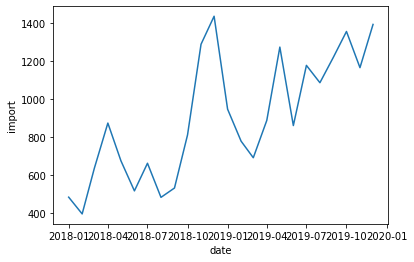

In [4]:
plt.xlabel('date')
plt.ylabel('import')
plt.plot(indexedDataset)

In [5]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                 Import
Month                  
2018-01-01          NaN
2018-02-01          NaN
2018-03-01          NaN
2018-04-01          NaN
2018-05-01          NaN
2018-06-01          NaN
2018-07-01          NaN
2018-08-01          NaN
2018-09-01          NaN
2018-10-01          NaN
2018-11-01          NaN
2018-12-01   732.500000
2019-01-01   771.000000
2019-02-01   802.833333
2019-03-01   807.416667
2019-04-01   808.583333
2019-05-01   858.333333
2019-06-01   886.916667
2019-07-01   929.750000
2019-08-01   979.916667
2019-09-01  1037.166667
2019-10-01  1082.416667
2019-11-01  1072.166667
2019-12-01  1068.583333                 Import
Month                 
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01  325.707482
2019-01-01  320.933581
2019-02-01  298.518412
2019-03-

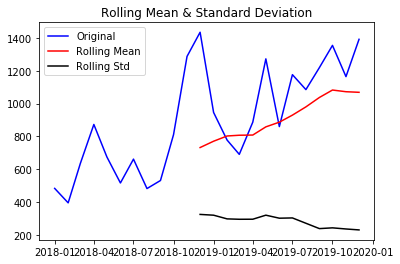

In [6]:
#plot rollling statistics
orig = plt.plot(indexedDataset, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [7]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Import'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)



Results of Dickey Fuller Test:
Test Statistics                -0.811463
p-value                         0.815732
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


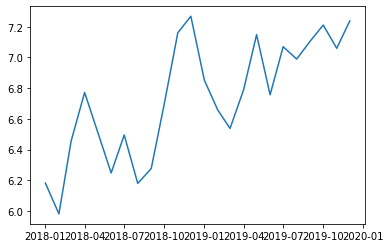

In [8]:
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


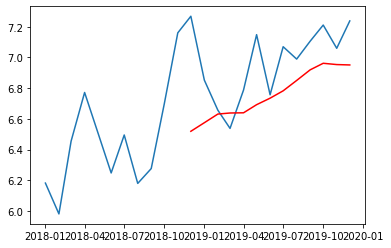

In [9]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

#time series still not stationary

In [10]:
datasetlogScaleandMovingAverage = indexedDataset_logScale - movingAverage
datasetlogScaleandMovingAverage.head(12)

datasetlogScaleandMovingAverage.dropna(inplace=True)
datasetlogScaleandMovingAverage.head(10)

,Import
Month,
2018-12-01,0.748900
2019-01-01,0.277073
2019-02-01,0.025281
2019-03-01,-0.100217
2019-04-01,0.148162
2019-05-01,0.455860
2019-06-01,0.022039
2019-07-01,0.287097
2019-08-01,0.139115


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Import'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
    

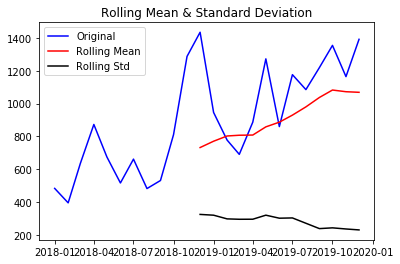

Results of Dickey Fuller Test:
Test Statistics                -0.811463
p-value                         0.815732
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [12]:
test_stationarity(datasetlogScaleandMovingAverage)

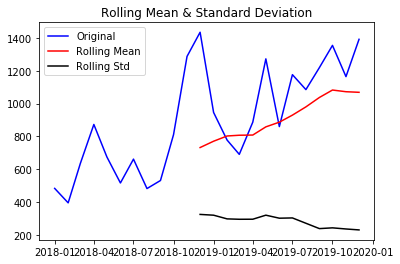

Results of Dickey Fuller Test:
Test Statistics                -0.811463
p-value                         0.815732
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Import'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
test_stationarity(datasetlogScaleandMovingAverage)    

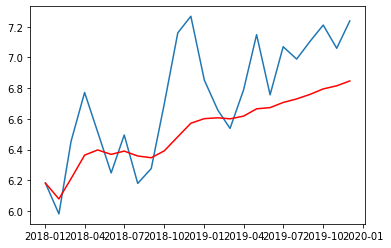

In [14]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

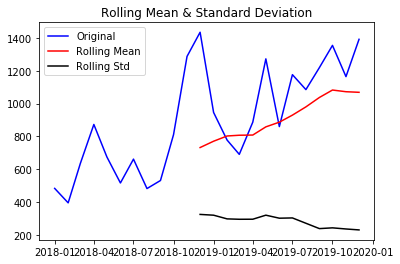

Results of Dickey Fuller Test:
Test Statistics                -0.811463
p-value                         0.815732
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [15]:
datasetlogScaleandMovingexponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleandMovingexponentialDecayAverage)

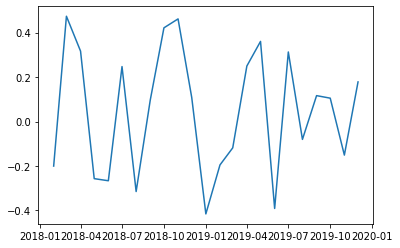

In [16]:
datasetlogOffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogOffShifting)

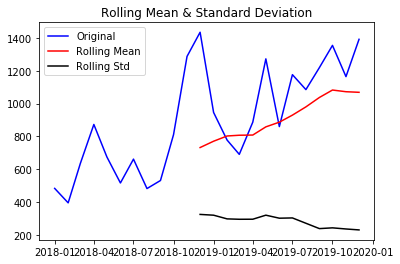

Results of Dickey Fuller Test:
Test Statistics                -0.811463
p-value                         0.815732
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [17]:
datasetlogOffShifting.dropna(inplace=True)
test_stationarity(datasetlogOffShifting)

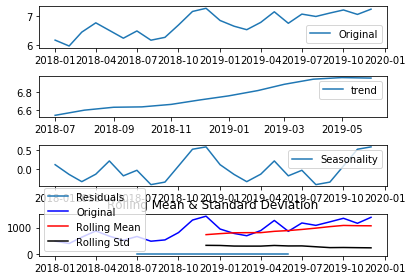

Results of Dickey Fuller Test:
Test Statistics                -0.811463
p-value                         0.815732
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [18]:
#components of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

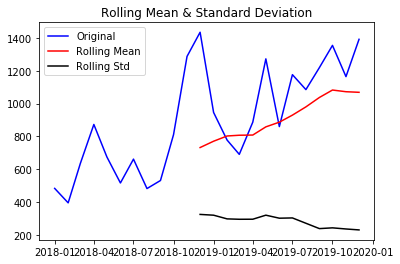

Results of Dickey Fuller Test:
Test Statistics                -0.811463
p-value                         0.815732
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [19]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


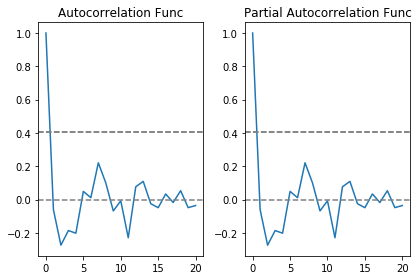

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogOffShifting, nlags=20)
lag_pacf = pacf(datasetlogOffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Func')

#Plot PACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Func')
plt.tight_layout()
                          
                          

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


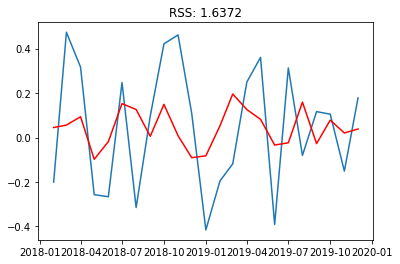

In [31]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model=ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogOffShifting['Import'])**2))
print('Plotting AR Model')

Plotting AR Model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


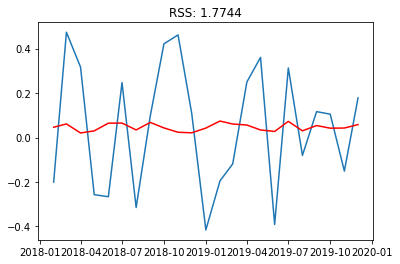

In [32]:
#MA MODEL
model=ARIMA(indexedDataset_logScale, order=(1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogOffShifting['Import'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.2519')

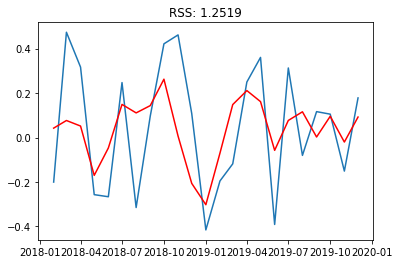

In [33]:
model=ARIMA(indexedDataset_logScale, order=(0,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogOffShifting['Import'])**2))


In [34]:
pridictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pridictions_ARIMA_diff.head())

Month
2018-02-01    0.042214
2018-03-01    0.076514
2018-04-01    0.051573
2018-05-01   -0.170477
2018-06-01   -0.047181
dtype: float64


In [35]:
#Convert to Cummulative Sum
pridictions_ARIMA_diff_cumsum = pridictions_ARIMA_diff.cumsum()
print(pridictions_ARIMA_diff_cumsum.head())

Month
2018-02-01    0.042214
2018-03-01    0.118728
2018-04-01    0.170301
2018-05-01   -0.000176
2018-06-01   -0.047356
dtype: float64


In [36]:
pridictions_ARIMA_log = pd.Series(indexedDataset_logScale['Import'].ix[0], index= indexedDataset_logScale.index)
pridictions_ARIMA_log = pridictions_ARIMA_log.add(pridictions_ARIMA_diff_cumsum, fill_value=0)
pridictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-01-01    6.182085
2018-02-01    6.224299
2018-03-01    6.300813
2018-04-01    6.352386
2018-05-01    6.181909
dtype: float64

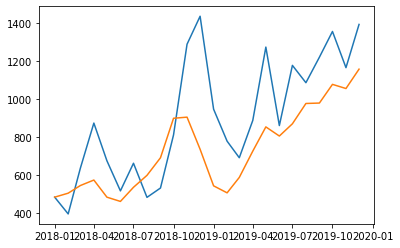

In [37]:
pridictions_ARIMA = np.exp(pridictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(pridictions_ARIMA)

In [38]:
indexedDataset_logScale

,Import
Month,
2018-01-01,6.182085
2018-02-01,5.981414
2018-03-01,6.455199
2018-04-01,6.771936
2018-05-01,6.514713
2018-06-01,6.248043
2018-07-01,6.495266
2018-08-01,6.180017
2018-09-01,6.276643


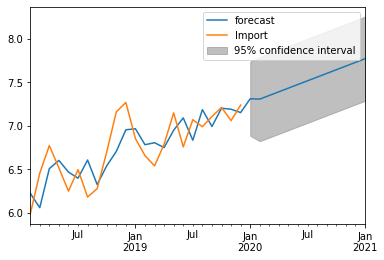

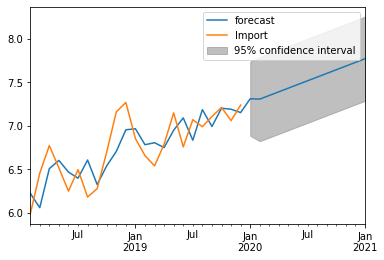

In [39]:
results_ARIMA.plot_predict(1,36)



In [40]:
results_ARIMA.forecast(steps=12)

(array([7.31083231, 7.30661715, 7.34883103, 7.3910449 , 7.43325877,
        7.47547264, 7.51768652, 7.55990039, 7.60211426, 7.64432813,
        7.68654201, 7.72875588]),
 array([0.217452 , 0.2470562, 0.2470562, 0.2470562, 0.2470562, 0.2470562,
        0.2470562, 0.2470562, 0.2470562, 0.2470562, 0.2470562, 0.2470562]),
 array([[6.88463423, 7.7370304 ],
        [6.82239591, 7.7908384 ],
        [6.86460978, 7.83305227],
        [6.90682365, 7.87526614],
        [6.94903752, 7.91748002],
        [6.9912514 , 7.95969389],
        [7.03346527, 8.00190776],
        [7.07567914, 8.04412163],
        [7.11789301, 8.08633551],
        [7.16010689, 8.12854938],
        [7.20232076, 8.17076325],
        [7.24453463, 8.21297712]]))

In [41]:
x=results_ARIMA.forecast(steps=12)
print(x[0])


[7.31083231 7.30661715 7.34883103 7.3910449  7.43325877 7.47547264
 7.51768652 7.55990039 7.60211426 7.64432813 7.68654201 7.72875588]


In [42]:
print(np.exp(x[0]))

[1496.42216276 1490.12777949 1554.3784371  1621.39942559 1691.31019483
 1764.2353451  1840.30484911 1919.65428369 2002.4250714  2088.76473262
 2178.82714841 2272.77283483]
